In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import statsmodels.formula.api as smf
import pingouin as pg

In [2]:
# load the data
mao = pd.read_csv("mao.dat", header=0, delimiter="\t")

# ensure 'type' is treated as a categorical variable
mao['type'] = mao['type'].astype('category')

In [3]:
mao_fit = smf.ols(formula='activity ~ type', data=mao).fit()
print(mao_fit.summary())

                            OLS Regression Results                            
Dep. Variable:               activity   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     6.346
Date:                Fri, 12 Sep 2025   Prob (F-statistic):            0.00411
Time:                        13:11:09   Log-Likelihood:                -107.86
No. Observations:                  42   AIC:                             221.7
Df Residuals:                      39   BIC:                             226.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.8056      0.772     12.703      0.0

In [4]:
mao.groupby('type')['activity'].mean()

/var/folders/79/mb1hycd508z4dzj6_g586h1w0000gq/T/ipykernel_4288/4189625190.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mao.groupby('type')['activity'].mean()


type
1    9.805556
2    6.281250
3    5.962500
Name: activity, dtype: float64

In [5]:
from statsmodels.stats.anova import anova_lm
anova_lm(mao_fit, typ=2)

,sum_sq,df,F,PR(>F)
type,136.117192,2.0,6.34613,0.004111
Residual,418.252569,39.0,NaN,NaN


Text(0.5, 1.0, 'Tukey-Anscombe Plot')

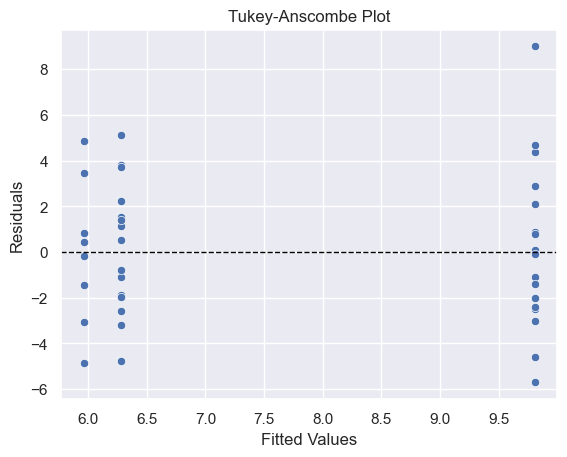

In [6]:
# Tukey-Anscombe plot
sns.scatterplot(x=mao_fit.fittedvalues, y=mao_fit.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title("Tukey-Anscombe Plot")

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

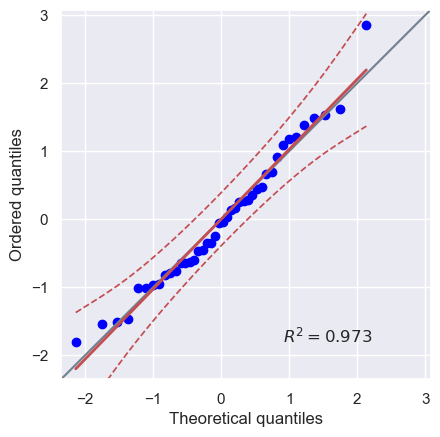

In [7]:
import pingouin as pg
pg.qqplot(mao_fit.resid)